In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import argv

pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

get_ipython().run_line_magic("matplotlib", "inline")

import matplotlib.pylab as plt
import pylab as pl
from matplotlib.ticker import FuncFormatter

from matplotlib.pyplot import figure

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)


import copy
import os

results_all = {}

/tmp/ipykernel_193589/2741796921.py:2: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


1
4
12
8
6
3
14
2
13
15
9
10
7
5
11
Array 1 converges at index 888
Array 4 converges at index 1148
Array 12 does not converge
Array 8 converges at index 1142
Array 6 does not converge
Array 3 converges at index 702
Array 14 converges at index 1128
Array 2 converges at index 892
Array 13 does not converge
Array 15 does not converge
Array 9 converges at index 1127
Array 10 converges at index 1129
Array 7 converges at index 1165
Array 5 converges at index 1037
Array 11 converges at index 1085
{'1': 2809, '4': 141, '12': 0, '8': 361, '6': 0, '3': 7642, '14': 311, '2': 4643, '13': 0, '15': 0, '9': 651, '10': 705, '7': 14, '5': 1534, '11': 957}
[('1', 2809), ('2', 4643), ('3', 7642), ('4', 141), ('5', 1534), ('6', 0), ('7', 14), ('8', 361), ('9', 651), ('10', 705), ('11', 957), ('12', 0), ('13', 0), ('14', 311), ('15', 0)]


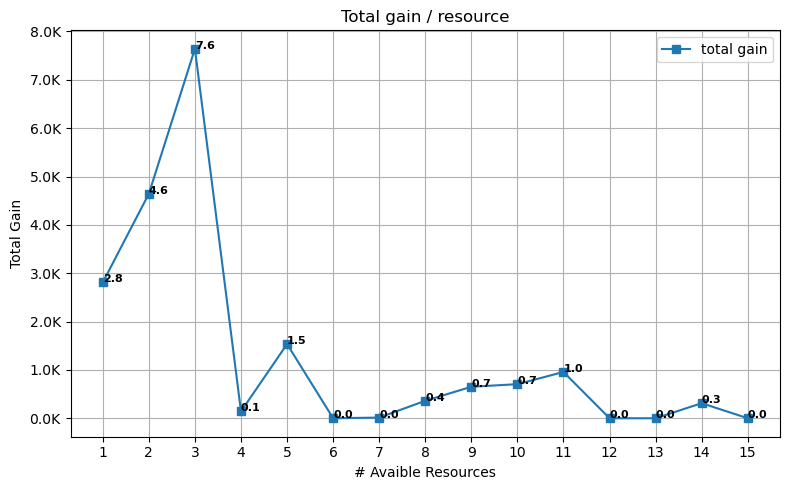

1
4
12
8
6
3
14
2
13
15
9
10
7
5
11
Array 1 converges at index 1020
Array 4 converges at index 1149
Array 12 converges at index 379
Array 8 does not converge
Array 6 does not converge
Array 3 converges at index 1153
Array 14 does not converge
Array 2 converges at index 1101
Array 13 does not converge
Array 15 converges at index 1165
Array 9 does not converge
Array 10 does not converge
Array 7 converges at index 1129
Array 5 converges at index 172
Array 11 does not converge
{'1': 2176, '4': 231, '12': 14188, '8': 0, '6': 0, '3': 228, '14': 0, '2': 515, '13': 0, '15': 20, '9': 0, '10': 0, '7': 740, '5': 22434, '11': 0}
[('1', 2176), ('2', 515), ('3', 228), ('4', 231), ('5', 22434), ('6', 0), ('7', 740), ('8', 0), ('9', 0), ('10', 0), ('11', 0), ('12', 14188), ('13', 0), ('14', 0), ('15', 20)]


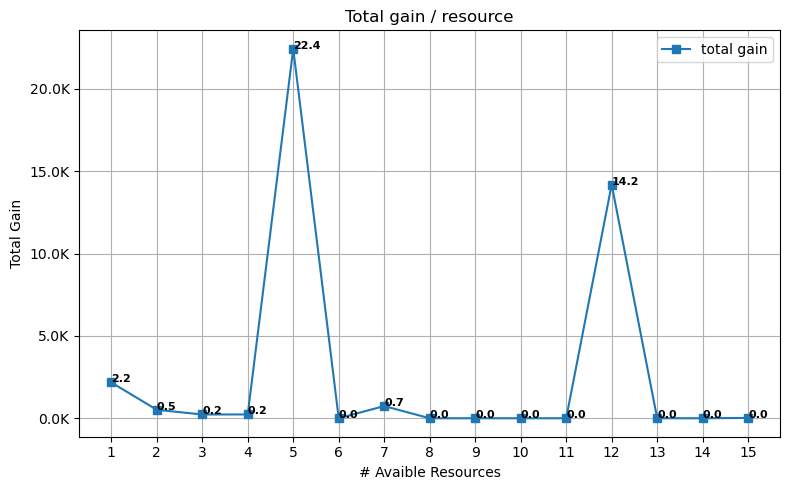

1
4
12
8
6
3
14
2
13
15
9
10
7
5
11
Array 1 converges at index 977
Array 4 converges at index 1126
Array 12 does not converge
Array 8 converges at index 1164
Array 6 converges at index 1074
Array 3 converges at index 1081
Array 14 converges at index 262
Array 2 does not converge
Array 13 does not converge
Array 15 converges at index 255
Array 9 converges at index 1123
Array 10 does not converge
Array 7 converges at index 254
Array 5 converges at index 1141
Array 11 does not converge
{'1': 1983, '4': 705, '12': 0, '8': 39, '6': 1317, '3': 1301, '14': 19859, '2': 0, '13': 0, '15': 23296, '9': 469, '10': 0, '7': 17508, '5': 465, '11': 0}
[('1', 1983), ('2', 0), ('3', 1301), ('4', 705), ('5', 465), ('6', 1317), ('7', 17508), ('8', 39), ('9', 469), ('10', 0), ('11', 0), ('12', 0), ('13', 0), ('14', 19859), ('15', 23296)]


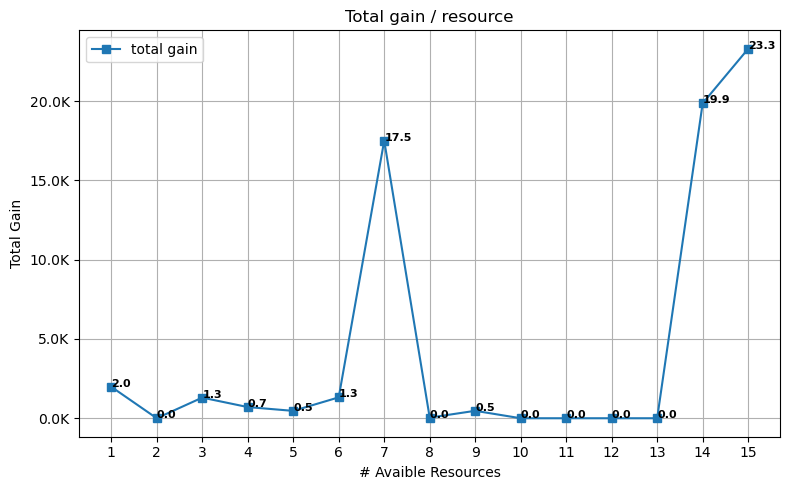

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1, 2322.6666666666665)
(2, 1719.3333333333333)
(3, 3057.0)
(4, 359.0)
(5, 8144.333333333333)
(6, 439.0)
(7, 6087.333333333333)
(8, 133.33333333333334)
(9, 373.3333333333333)
(10, 235.0)
(11, 319.0)
(12, 4729.333333333333)
(13, 0.0)
(14, 6723.333333333333)
(15, 7772.0)

Key: 5, max: 8144.333333333333


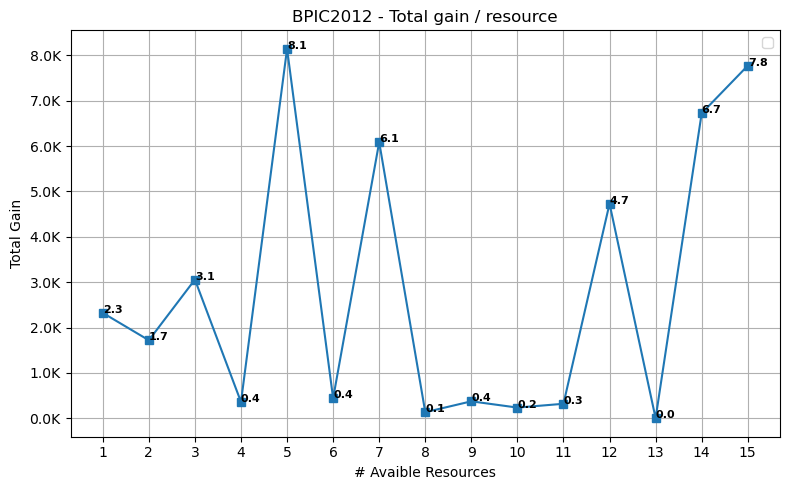

In [7]:
import os
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.ticker as ticker
import os
import glob


dfs = []
mydict = {}
datasets = [
    "bpic2012",
    # "bpic2017",
    # "traficFines",
]  

durations = []
interventions = []

dicts = {}

durations2 = {}
interventions2 = {}


def millions(x, pos):
    "The two args are the value and tick position"
    return "%1.1fK" % (x * 1e-3)


def find_convergence(arr):
    convergence_point = None
    for i, value in enumerate(arr):
        if value > 0:
            if all(v > 0 for v in arr[i:]):
                convergence_point = i
                break
    return convergence_point


for dataset_name in datasets:
    if dataset_name == "bpic2012":
        sig = 12
    else:
        sig = 100

    # to obtain the elapsed intervention time
    durations2[dataset_name] = []

    # to collect how many interventions
    interventions2[dataset_name] = []

    # Run each expr three times
    iterations = [1, 2, 3]
    for it in iterations:
        dfs = []
        sum_gaines = {}
        gains = {}

        directory = os.path.join(
            "/home/mshoush/RL_from_cloud/myCode/resultsICPM/%s/%s/ResourcesResults_%s/resultsResources_%s/"
            % (dataset_name, dataset_name, dataset_name, it)
        )
        for root, dirs, files in os.walk(directory):
            title = root
            for dirr in dirs:
                path = directory + dirr
                csv_files = glob.glob(os.path.join(path, "*.csv"))
                for f in csv_files:
                    df = pd.read_csv(f, sep=";")
                    # nr of resources
                    df.name = str(f).split("/")[-1].split("_")[2]
                    print(df.name)
                    dfs.append(df)
                    durations2[dataset_name].append(df[df.columns[-1]].iloc[0])
                    interventions2[dataset_name].append(df.shape[0])

        for df in dfs:
            gains[df.name] = gaussian_filter1d(df.gain, sigma=sig)

            convergence_index = find_convergence(gains[df.name])
            if convergence_index is None:
                print(f"Array {df.name} does not converge")
                sum_after_convergence = 0
            else:
                print(f"Array {df.name} converges at index {convergence_index}")

                # Calculate sum from convergence point to the end
                sum_after_convergence = np.sum(gains[df.name][convergence_index:])

            sum_gaines[df.name] = sum_after_convergence  # sum(df.gain)


        formatter = FuncFormatter(millions)
        print(sum_gaines)
        lists = sorted(
            sum_gaines.items(), key=lambda item: int(item[0])
        )  
        print(lists)

        x, y = zip(*lists)  # unpack a list of pairs into two tuples
        mydict[it] = lists
        fig, ax = plt.subplots()

        ax.plot(x[::], y[::], label="total gain", marker="s")

        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )

        plt.grid(True)
        ax.yaxis.set_major_formatter(formatter)
        plt.legend(loc="best")
        plt.ylabel("Total Gain")
        plt.xlabel("# Avaible Resources")
        plt.title("Total gain / resource")
        plt.tight_layout()
        plt.show()

    dicts[dataset_name] = [
        interventions2[dataset_name][0],
        1,
        round(np.mean(durations2[dataset_name], axis=0)),
    ]
    combined_tuples = []
    for k, v in mydict.items():
        [combined_tuples.append(tuple(sub)) for sub in v]

    # Create a dictionary to store the sum and count for each key
    sum_count_dict = {}
    for key, value in combined_tuples:
        if key not in sum_count_dict:
            sum_count_dict[key] = [value, 1]
        else:
            sum_count_dict[key][0] += value
            sum_count_dict[key][1] += 1

    # Calculate the average value for each key
    averages = {
        key: sum_value / count for key, (sum_value, count) in sum_count_dict.items()
    }

    # Print the average values for each key
    for key, average in averages.items():
        print(f"({key}, {average})")

    print(
        f"\nKey: {max(averages, key=averages.get)}, max: {averages[max(averages, key=averages.get)]}"
    )

    my_list = list(averages.items())

    x, y = zip(*my_list)  # unpack a list of pairs into two tuples
    fig, ax = plt.subplots()

    # ("%s - Total gain / resource"% dataset_name.upper())

    if dataset_name.startswith("tr"):
        pass
        ax.plot(x[::], y[::], marker="s")

        for xs, ys in zip(x[::3], y[::3]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )
        plt.xticks(x[::3], rotation=0)

    else:

        ax.plot(x[::], y[::], marker="s")

        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )

    plt.grid(True)
    ax.yaxis.set_major_formatter(formatter)
    plt.legend(loc="best")
    plt.ylabel("Total Gain")
    plt.xlabel("# Avaible Resources")
    plt.title("%s - Total gain / resource" % dataset_name.upper())
    plt.tight_layout()
    plt.show()

    results_all[dataset_name] = my_list
    results_all

In [8]:
# Extracted records post-simulation:
# {dataset: [# triggered interventions, Tdur, simulation duration]}
dicts

{'bpic2012': [1172, 1, 365]}

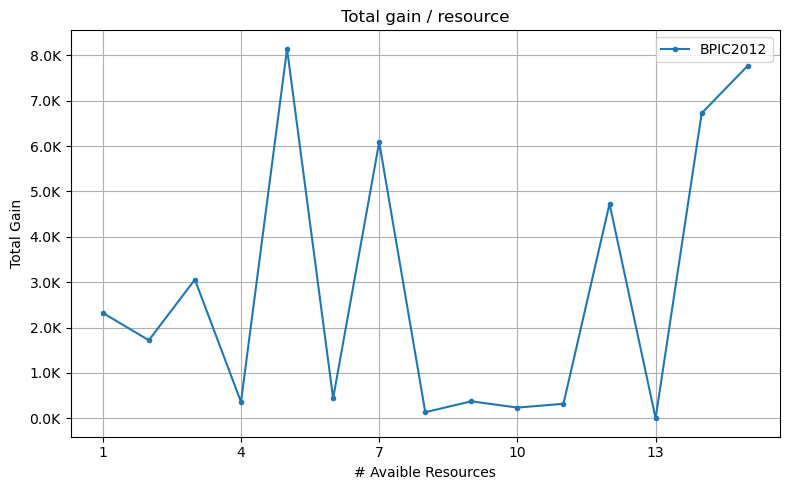

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

for k, v in results_all.items():
    my_list = v
    x, y = zip(*my_list)  # unpack a list of pairs into two tuples
    if k=="traficFines":
        k="trafficFines"
    else:
        pass

    ax.plot(x[::], y[::], label="%s" % k.upper(), marker=".")


plt.grid(True)
ax.yaxis.set_major_formatter(formatter)
plt.legend(loc="best")
plt.ylabel("Total Gain")
plt.xlabel("# Avaible Resources")
plt.title("Total gain / resource")
plt.xticks(x[::3], rotation=0) 
plt.tight_layout()

plt.show()




In [10]:
keyss = []

resUtilzList = {}
resUtilz = {}

ll = []



i = 0
for k, v in dicts.items():
    resUtilz = {}
    dataset = k
    x, y = zip(*results_all[k])
    nrInterventions = v[0]
    tdur = v[1]
    elapsedTime = v[2]
    print(
        f"Data: {dataset}, inter: {nrInterventions}, tdur: {tdur}, time: {elapsedTime}"
    )

    for j in x:
        resUtilz[j] = "{:.1%}".format(
            ((nrInterventions * tdur) / (int(j) * elapsedTime))
        )
    resUtilzList[dataset] = resUtilz

    resUtilz = dict(sorted(resUtilz.items(), key=lambda item: int(item[0])))

    resUtilzList[k] = resUtilz

    keys = list(resUtilz.keys())
    values = list(resUtilz.values())

    combined_labels = [
        f"{key}\n\n{value}" for key, value in resUtilz.items()
    ]  
    combined_labels
    ll.append(combined_labels)
    keyss.append(keys)
    print(resUtilz)
    print("")

Data: bpic2012, inter: 1172, tdur: 1, time: 365
{'1': '321.1%', '2': '160.5%', '3': '107.0%', '4': '80.3%', '5': '64.2%', '6': '53.5%', '7': '45.9%', '8': '40.1%', '9': '35.7%', '10': '32.1%', '11': '29.2%', '12': '26.8%', '13': '24.7%', '14': '22.9%', '15': '21.4%'}



In [11]:
heatmap_ranges_dicts = {}

for k, v in resUtilzList.items():
    heatmap_ranges_dicts[k] = []
    print(k)
    print(v)

    percentages = resUtilzList[k]
    # Convert percentage values to float
    percent_float = [float(val.strip("%")) for val in percentages.values()]
    print(percent_float)
    # Calculate threshold values
    if k == "bpic2017":
        pass
        thresholds = [np.inf, 90, 70, 50, 25]
    else:
        thresholds = [np.inf, 90, 75, 50, 25]

    # Create heatmap_ranges
    heatmap_ranges = [1]
    for threshold in thresholds[1:]:
        if threshold >= 90:
            continue
        try:

            heatmap_ranges.append(
                next(
                    idx - 1
                    for idx, val in enumerate(percent_float, start=1)
                    if val <= threshold
                )
            )
        except:
            pass

    heatmap_ranges_dicts[k] = heatmap_ranges

    print(heatmap_ranges)
    print("")

bpic2012
{'1': '321.1%', '2': '160.5%', '3': '107.0%', '4': '80.3%', '5': '64.2%', '6': '53.5%', '7': '45.9%', '8': '40.1%', '9': '35.7%', '10': '32.1%', '11': '29.2%', '12': '26.8%', '13': '24.7%', '14': '22.9%', '15': '21.4%'}
[321.1, 160.5, 107.0, 80.3, 64.2, 53.5, 45.9, 40.1, 35.7, 32.1, 29.2, 26.8, 24.7, 22.9, 21.4]
[1, 4, 6, 12]



bpic2012
[1, 4, 6, 12]
[ 1.9  2.9  3.9  4.9  5.9  6.9  7.9  8.9  9.9 10.9 11.9 12.9 13.9 14.9
 15.9]


/tmp/ipykernel_193589/2956979916.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_193589/2956979916.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


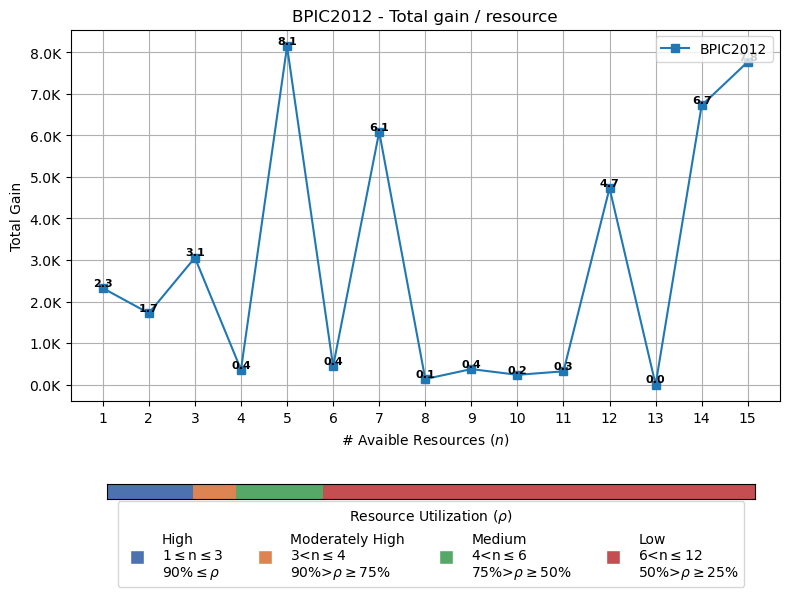

In [12]:
for k, heatmap_ranges in heatmap_ranges_dicts.items():
    print(k)
    print(heatmap_ranges)
    
    fig, ax = plt.subplots()

    import matplotlib.colors as mcolors

    
    x, y = zip(*results_all[k])

    if k=="traficFines":
        k="trafficFines"
    else:
        pass

    ax.plot(x[::], y[::], label="%s" % k.upper(), marker="s")
    if k.startswith("tr"):
        pass
        for xs, ys in zip(x[::3], y[::3]):
                pl.text(
                    xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
                    horizontalalignment='center',
             verticalalignment='bottom',
                )
    else:
        
        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
                horizontalalignment='center',
         verticalalignment='bottom',
            )

    

    plt.grid(True)
    ax.yaxis.set_major_formatter(formatter)
    plt.legend(loc="best")
    plt.ylabel("Total Gain")
    plt.subplots_adjust(bottom=-.6)  # Adjust this value to reduce the space
    plt.xlabel("# Avaible Resources ($n$)\n\n")
    if k.startswith("tr"):
        plt.xticks(x[::3], rotation=0) 
    else:
        plt.xticks(x[::], rotation=0)
    plt.title("%s - Total gain / resource"% k.upper())
    plt.tight_layout()



    heatmap_ranges = heatmap_ranges#[1, 10, 20, 40, 50]

    # Create data for the heatmap bar
    heatmap_data = np.arange(1.9, len(x)+1)
    print(heatmap_data)

    heatmap_colors = ["lightsteelblue", "lightblue", "silver", "antiquewhite",]
    heatmap_labels = [f"High\n${heatmap_ranges[0]}$$\\leq$n$\\leq${heatmap_ranges[1]-1}\n90%$\\leq$$\\rho$",
                      f"Moderately High\n${heatmap_ranges[1]-1}$<n$\\leq${heatmap_ranges[1]}\n90%>$\\rho\geq$75%",
                      f"Medium\n${heatmap_ranges[1]}$<n$\\leq${heatmap_ranges[2]}\n75%>$\\rho\geq$50%",
                      f"Low\n${heatmap_ranges[2]}$<n$\\leq${heatmap_ranges[3]}\n50%>$\\rho\geq$25%",]
    heatmap_ranges = heatmap_ranges

    # Create a colormap
    import  seaborn as sns
    sns.color_palette()#
    cmap =mcolors.ListedColormap(heatmap_colors)
    heatmap_ranges_BoundaryNorm = [heatmap_ranges[0], 
                                   heatmap_ranges[1]-1,
                                   heatmap_ranges[1], 
                                   heatmap_ranges[2], 
                                   heatmap_ranges[3],
                                  ]
    norm = mcolors.BoundaryNorm(heatmap_ranges_BoundaryNorm, cmap.N)
    palette = sns.color_palette("deep", n_colors=len(heatmap_ranges))

    cmap = mcolors.ListedColormap(palette)
    # Create proxy artists for the legend
    proxy_artists = [
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
        for color, label in zip(palette, heatmap_labels)
    ]
    if k.startswith("tra"):
        heatmap_ax = fig.add_axes([0.15, -0.01, 0.81, 0.03])  # Adjust the y-coordinate and other values as needed
        heatmap_ax.imshow([heatmap_data], cmap=cmap, norm=norm,
                          aspect="auto", extent=[0, int(heatmap_ranges[-1]), 0, 1])
        legend = plt.legend(handles=proxy_artists, 
                        bbox_to_anchor=[0.5, -3], loc='center', 
                         title='Resource Utilization ($\\rho$)', ncol=4, )
    else:
        heatmap_ax = fig.add_axes([0.14, -0.01, 0.81, 0.03])  # Adjust the y-coordinate and other values as needed

        heatmap_ax.imshow([heatmap_data], cmap=cmap, norm=norm,
                          aspect="auto", extent=[0, int(heatmap_ranges[-1]), 0, 1])
        legend = plt.legend(handles=proxy_artists, 
                        bbox_to_anchor=[0.5, -3], loc='center', 
                         title='Resource Utilization ($\\rho$)', ncol=4, )

    heatmap_ax.set_yticks([])
    heatmap_ax.set_xticks([])


    
    plt.tight_layout()
    plt.show()









# Plot All components

In [13]:
heatmap_ranges_dicts

{'bpic2012': [1, 4, 6, 12]}

In [14]:
def plot1(
    result_df, dataset_name, typee="None",
):

    print(dataset_name)
    if typee == "sumGain":
        pivot_df = result_df.pivot(index='comp', columns='resUtil', values='sumGain')
    else:
        pivot_df = result_df.pivot(index='comp', columns='resUtil', values='convergence')

    ax = pivot_df.plot(kind="bar", rot="horizontal")  # label=l)

    hh = []
    for bar in ax.patches:
        height = np.round(bar.get_height())
        hh.append(height)
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()

        if height < 1000:
            label_text = ""
        else:
            label_text = "{:.1f}k".format(height / 1000)

        if typee == "convergence" and height > 100:
            label_text = "{:.1f}k".format(height / 1000)
        elif typee == "convergence" and height < 100:
            label_text = ""
        else:
            pass

        label_x = x + width / 2
        label_y = y + height  # / 2
        ax.text(
            label_x,
            label_y,
            label_text,
            ha="center",  
            va="top",
            fontsize=8,
            rotation=90,
        )

    if typee == "sumGain":
        t = "%s -  Performance (Total gain)" % dataset_name.upper()
    else:
        t = "%s -  Convergence" % dataset_name.upper()

    ax.legend(
        bbox_to_anchor=(0.9, 1.3),
        loc="best",
        fancybox=True,
        shadow=True,
        title=t,
        ncol=2,
        # nrow=2,
        title_fontsize=10,
        prop={"size": 10,},
        labels=[  # l,
            "High",
            "Moderately High",
            "Medium",
            "Low",
            "BL2 - Metzger et al",
            "BL1 - Bozorgi et al.",
        ],
    )
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel("")
    if typee == "sumGain":
        ax.set_ylabel("Total gain")
    else:
        ax.set_ylabel("# Cases")

    plt.grid(True)
    plt.show()

bpic2012
{1: 'High', 4: 'Moderately High', 6: 'Medium', 12: 'Low', 'Zahra': 'BL1 - Bozorgi et al.', 'Metzger': 'BL2 - Metzger et al'}
gains_dict: {1: {1: [array([-67, -67, -67, ...,  28,  28,  28])], 4: [array([-68, -68, -68, ...,  46,  46,  46])], 6: [array([-81, -81, -81, ...,   5,   5,   5])], 12: [array([ -72,  -72,  -72, ..., -110, -110, -110])], 'Zahra': [array([-113, -113, -113, ...,  -31,  -31,  -31])], 'Metzger': [array([-186, -186, -186, ...,  -10,  -10,   -9])]}, 2: {1: [array([-64, -64, -64, ...,  35,  35,  35])], 4: [array([-59, -59, -59, ...,  13,  13,  13])], 6: [array([-83, -83, -83, ...,  32,  32,  32])], 12: [array([-60, -60, -60, ...,  37,  38,  38])], 'Zahra': [array([-137, -137, -137, ...,   24,   24,   25])], 'Metzger': [array([-185, -185, -185, ...,  -44,  -43,  -43])]}, 3: {1: [array([-78, -78, -78, ...,  29,  29,  29])], 4: [array([-82, -82, -82, ...,  31,  31,  31])], 6: [array([-57, -57, -57, ...,  -4,  -3,  -3])], 12: [array([-65, -65, -65, ..., -30, -30, -2

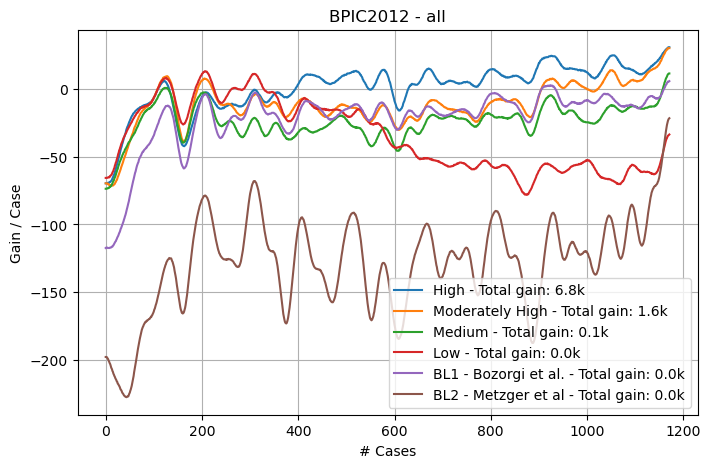

gains_dict: {1: {1: [array([-56, -56, -56, ...,  43,  43,  43])], 4: [array([-79, -79, -79, ...,  24,  24,  25])], 6: [array([-78, -78, -78, ...,   0,   0,   0])], 12: [array([-113, -113, -113, ...,  -22,  -22,  -21])], 'Zahra': [array([-113, -113, -113, ...,  -31,  -31,  -31])], 'Metzger': [array([-186, -186, -186, ...,  -10,  -10,   -9])]}, 2: {1: [array([-70, -70, -70, ...,  38,  38,  38])], 4: [array([-79, -80, -80, ...,  28,  28,  28])], 6: [array([-75, -75, -76, ...,  33,  33,  33])], 12: [array([-83, -83, -82, ...,  38,  38,  38])], 'Zahra': [array([-137, -137, -137, ...,   24,   24,   25])], 'Metzger': [array([-185, -185, -185, ...,  -44,  -43,  -43])]}, 3: {1: [array([-65, -65, -65, ...,  23,  24,  24])], 4: [array([-54, -54, -54, ...,  29,  29,  29])], 6: [array([-56, -56, -57, ...,  14,  14,  14])], 12: [array([-110, -110, -110, ...,   46,   46,   46])], 'Zahra': [array([-102, -101, -101, ...,   23,   23,   23])], 'Metzger': [array([-222, -222, -222, ...,  -14,  -13,  -13])]

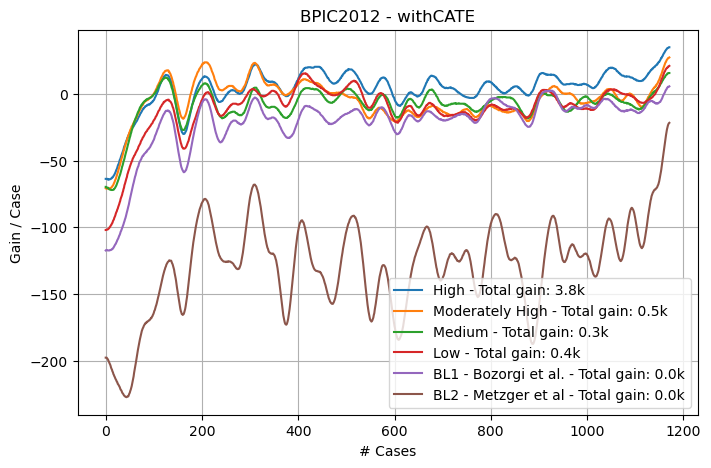

gains_dict: {1: {1: [array([-73, -74, -74, ...,  27,  27,  27])], 4: [array([-78, -78, -78, ...,  14,  14,  15])], 6: [array([-65, -65, -65, ..., -50, -50, -50])], 12: [array([-36, -36, -36, ..., -77, -76, -76])], 'Zahra': [array([-113, -113, -113, ...,  -31,  -31,  -31])], 'Metzger': [array([-186, -186, -186, ...,  -10,  -10,   -9])]}, 2: {1: [array([-95, -95, -95, ...,  37,  37,  37])], 4: [array([-72, -72, -72, ..., -13, -13, -12])], 6: [array([-68, -68, -68, ...,   0,   0,   0])], 12: [array([-71, -71, -71, ..., -19, -19, -19])], 'Zahra': [array([-137, -137, -137, ...,   24,   24,   25])], 'Metzger': [array([-185, -185, -185, ...,  -44,  -43,  -43])]}, 3: {1: [array([-73, -73, -73, ...,  42,  42,  42])], 4: [array([-63, -63, -64, ...,  28,  28,  28])], 6: [array([-76, -76, -76, ..., -11, -11, -11])], 12: [array([-103, -103, -103, ...,  -37,  -37,  -37])], 'Zahra': [array([-102, -101, -101, ...,   23,   23,   23])], 'Metzger': [array([-222, -222, -222, ...,  -14,  -13,  -13])]}}
com

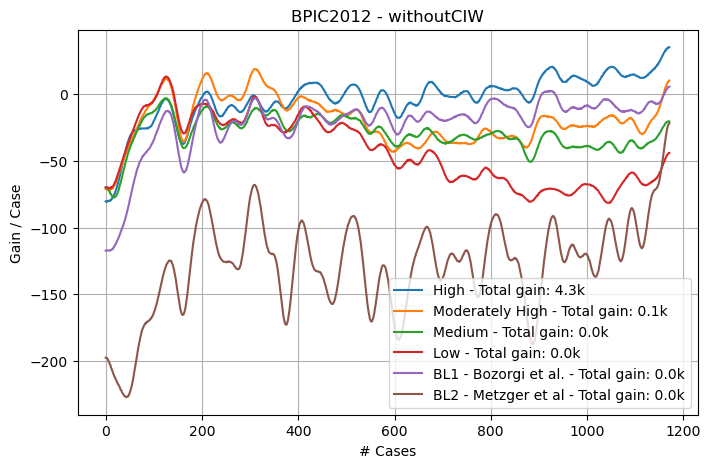

gains_dict: {1: {1: [array([-72, -72, -72, ...,  42,  42,  42])], 4: [array([-64, -64, -64, ...,   3,   3,   3])], 6: [array([-65, -65, -65, ...,  23,  23,  24])], 12: [array([-92, -92, -92, ...,  20,  20,  20])], 'Zahra': [array([-113, -113, -113, ...,  -31,  -31,  -31])], 'Metzger': [array([-186, -186, -186, ...,  -10,  -10,   -9])]}, 2: {1: [array([-65, -65, -66, ...,  37,  37,  37])], 4: [array([-60, -60, -60, ...,  -1,   0,   0])], 6: [array([-66, -66, -66, ...,  22,  22,  22])], 12: [array([-58, -58, -59, ...,  45,  45,  45])], 'Zahra': [array([-137, -137, -137, ...,   24,   24,   25])], 'Metzger': [array([-185, -185, -185, ...,  -44,  -43,  -43])]}, 3: {1: [array([-69, -69, -69, ...,   6,   6,   6])], 4: [array([-66, -66, -66, ...,  25,  25,  25])], 6: [array([-67, -67, -67, ...,  23,  23,  23])], 12: [array([-57, -57, -57, ...,  32,  32,  32])], 'Zahra': [array([-102, -101, -101, ...,   23,   23,   23])], 'Metzger': [array([-222, -222, -222, ...,  -14,  -13,  -13])]}}
combined_

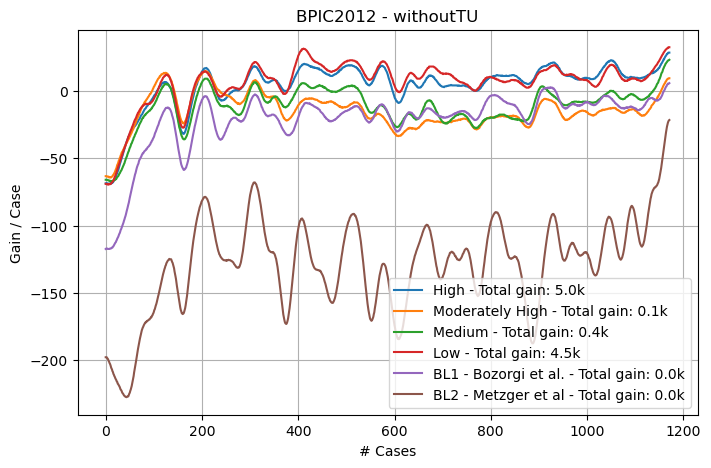

bpic2012


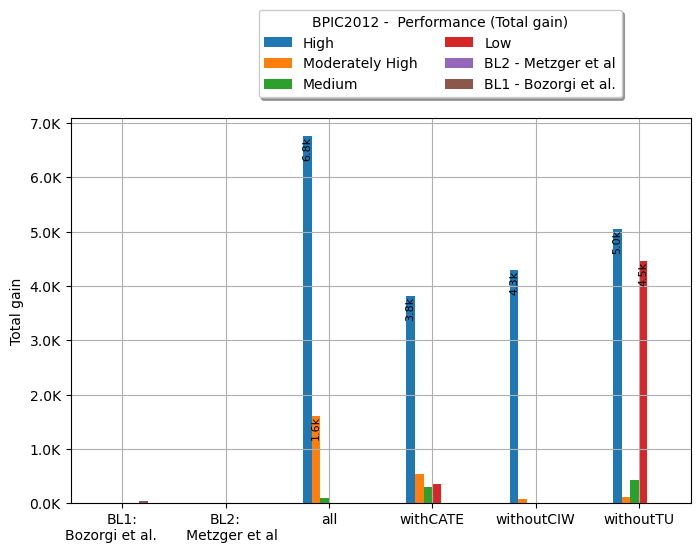

bpic2012


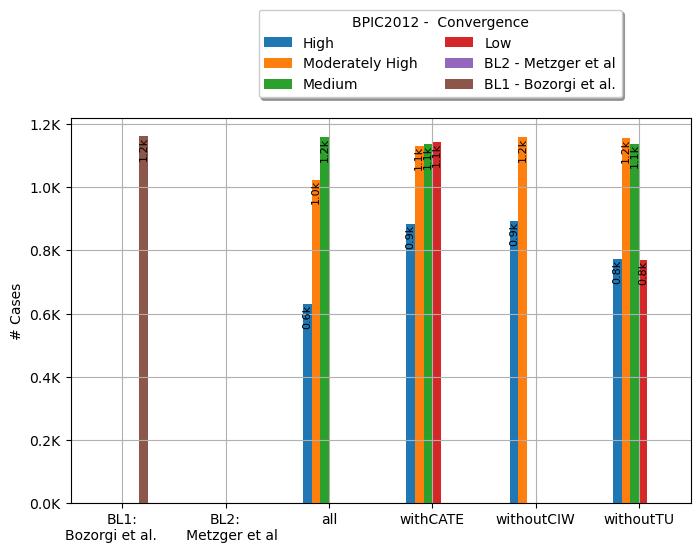

In [20]:
ranges = {}
levels = ["High", "Moderately High", "Medium", "Low",]


dfs = []

datasets = [
    "bpic2012",
    # "bpic2017",
    # "traficFines"
]  

components = [
    "all",
    "withCATE",
    "withoutCIW",
    "withoutTU",
]


iterations = [1, 2, 3]
ranges = {}
dfs_dict = {}  # {it: [dfs]}
gains_dict = {}
convergence_dict_comp = {}


for k, v in heatmap_ranges_dicts.items():
    print(k)
    #print(v)
    #print(v.index(1))
    
    for value in v:
        ranges[value]=levels[v.index(value)]
        if value == v[-1]:
            ranges["Zahra"]="BL1 - Bozorgi et al."
            ranges["Metzger"]="BL2 - Metzger et al"
            #print(value)
        #print(value)
    print(ranges)
    dataset_name = k
    #print(dataset_name)

    if dataset_name == "bpic2012":
        sig = 12
    else:
        sig = 100
        
    for comp in components:
        convergence_dict_comp[comp] = {}

        iterations = [1, 2, 3]
        for it in iterations:
            gains_dict[it] = {}
            dfs_dict[it] = []

            for rang in ranges.items():
                if rang[0] not in ["Zahra", "Metzger"]:
                    path = os.path.join(
                        
                        
                        "/home/mshoush/RL_from_cloud/myCode/resultsICPM/%s/%s/%sComponents/%s/mahmoud%s/mahmoud%s"
                        % (dataset_name, dataset_name, dataset_name, comp, it, rang[0])
                    )
                else:
                    path = os.path.join(
                        # "/home/mshoush/RL_from_cloud/myCode/resultsICPM/%s/%s/ResourcesResults_%s/resultsResources_%s/"
                        #  % (dataset_name, dataset_name, dataset_name, it)
                        
                        
                        "/home/mshoush/RL_from_cloud/myCode/resultsICPM/%s/%s/%sComponents/%s/mahmoud%s"
                        % (dataset_name, dataset_name, dataset_name, rang[0], it,)
                    )
                csv_files = glob.glob(os.path.join(path, "*.csv"))
                for f in csv_files:
                    df = pd.read_csv(f, sep=";")
                    df.name = rang[0]  # str(f).split("/")[7]
                    dfs_dict[it].append((rang[0], df))
                    gains_dict[it][df.name] = []
                    
        for k, v in dfs_dict.items():
            it = k
            for df_name, df in v:
                gains_dict[it][df_name].append(gaussian_filter1d(df.gain, sigma=sig))
        print(f"gains_dict: {gains_dict}")

        combined_dict = {}

        for k, v in gains_dict.items():
            for key, value in v.items():
                combined_dict.setdefault(key, []).extend(value)
        print(f"combined_dict: {combined_dict}")

        gains = {}
        sum_gaines = {}
        avg_gaines = {}
        for k, v in combined_dict.items():
            print(f"k: {k} - v: {v}")
            gains[k] = np.mean(v, axis=0)
            sum_gaines[k] = sum(gains[k])
            avg_gaines[k] = np.mean(gains[k])


        def millions(x, pos):
            "The two args are the value and tick position"
            return "%1.1fK" % (x * 1e-3)

        for k, arr in gains.items():
            print(f"K: {k} - arr: {arr}")
            convergence_dict_comp[comp][k] = []

            convergence_index = find_convergence(arr)
            if convergence_index is None:
                print(f"Array {k} does not converge")
                convergence_dict_comp[comp][k].append([0, 0])
                sum_after_convergence = 0

            else:
                print(f"Array {k} converges at index {convergence_index}")

                # Calculate sum from convergence point to the end
                sum_after_convergence = np.sum(arr[convergence_index:])
                #print(f"Sum after convergence: {sum_after_convergence}")
                convergence_dict_comp[comp][k].append(
                    [convergence_index, sum_after_convergence]
                )
            print(" Total gain: {:.1f}k\n".format(sum_after_convergence / 1000))
            try:

                plt.plot(
                    arr,
                    label=ranges[k]
                    + " - Total gain: {:.1f}k".format(sum_after_convergence / 1000),
                )
            except:
                pass

        formatter = FuncFormatter(millions)
        plt.grid(True)
        plt.legend(loc="best")
        plt.ylabel("Gain / Case")
        plt.xlabel("# Cases")
        if dataset_name=="traficFines":
            d = "trafficFines"
            plt.title(f"{d.upper()} - {comp}")
        else:
            plt.title(f"{dataset_name.upper()} - {comp}")
        plt.show()

    comp = []
    resUtil = []
    convergence = []
    sumGain = []
    dfs = []

    for idx, (title, subdata) in enumerate(convergence_dict_comp.items()):
        columns = ["comp", "resUtil", "convergence", "sumGain"]
        empty_df = pd.DataFrame(columns=columns)
        comp = []
        resUtil = []
        convergence = []
        sumGain = []
        for k, v in subdata.items():
            conv = v[0][0]
            gain = v[0][1]
            if k == "Zahra":#
                #or k == "Metzger":
                comp.append("BL1:\nBozorgi et al.     ")
                resUtil.append("Zahra")
                convergence.append(conv)
                sumGain.append(gain)
                continue
            elif k == "Metzger":
                comp.append("BL2:\n   Metzger et al")
                resUtil.append("Metzger")
                convergence.append(conv)
                sumGain.append(gain)  
                continue

            comp.append(title)
            resUtil.append(k)
            convergence.append(conv)
            sumGain.append(gain)
#         if resUtil=="Zahra":
#             continue
        empty_df["comp"] = comp
        
        empty_df["resUtil"] = resUtil
        empty_df["convergence"] = convergence
        empty_df["sumGain"] = sumGain
        dfs.append(empty_df)
    result_df = pd.concat(dfs, ignore_index=True)
    result_df = result_df.drop_duplicates(keep="last")
    plot1(result_df, dataset_name, "sumGain")
    plot1(result_df, dataset_name, "convergence")


    
    
    ranges = {}
    #break

In [31]:
print("Done!")

Done!
